In [214]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
df = pd.read_csv('netflix_titles.csv', parse_dates= [0])

In [216]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


###### Checking For Duplicates


In [217]:
df.duplicated().sum()

0

###### checking for datatype

In [218]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

###### checking for missing values

In [219]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Analysis

#### 1. Trying to show if Netflix has a focus on movies or series in recent years

In [221]:
count_of_movies_by_type = df.groupby(df['type']).agg(number_of_movies = ('title','count')).reset_index()

In [222]:
count_of_movies_by_type

,type,number_of_movies
0,Movie,6131
1,TV Show,2676


   ##### Visualization

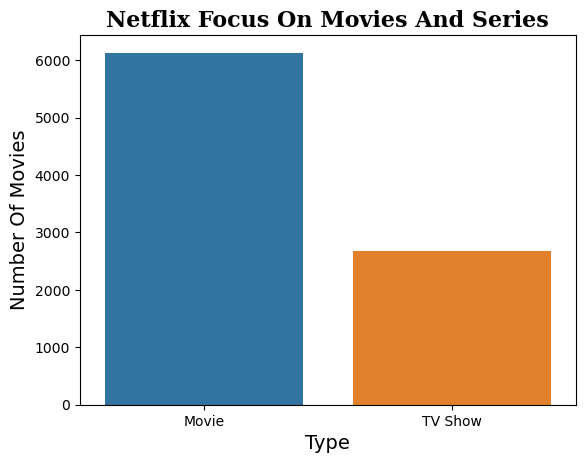

In [223]:
x = count_of_movies_by_type['type']
y = count_of_movies_by_type['number_of_movies']

sns.barplot(count_of_movies_by_type, x=x, y=y)
title_font = {
    'family': 'serif',
    'weight': 'bold',
    'color': 'black',
    'size': 16
}
plt.xlabel('Type',size = 14, weight = 'normal')
plt.ylabel('Number Of Movies',size = 14, weight = 'normal')

plt.title('Netflix Focus On Movies And Series', fontdict = title_font)
plt.show()

#### 2. Top 5 years that movies were added

In [224]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [225]:
df['year_added'] = df['date_added'].dt.year

In [226]:
movies_by_year_added = df.groupby(df['year_added']).agg(number_of_movies = ('title','count')).reset_index()

In [227]:
top_5_years_movies_were_added = movies_by_year_added.sort_values(by = 'number_of_movies', ascending= False)[0:5]

In [228]:
top_5_years_movies_were_added

,year_added,number_of_movies
11,2019.0,2016
12,2020.0,1879
10,2018.0,1649
13,2021.0,1498
9,2017.0,1188


###### Visualization

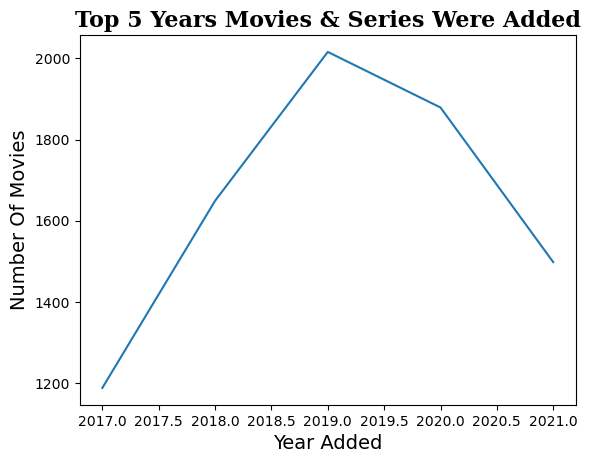

In [306]:
x = top_5_years_movies_were_added['year_added']
y = top_5_years_movies_were_added['number_of_movies']

sns.lineplot(top_5_years_movies_were_added, x=x, y=y )

title_font = {
    'family': 'serif',
    'weight': 'bold',
    'color': 'black',
    'size': 16
}
plt.title('Top 5 Years Movies & Series Were Added', fontdict = title_font)
plt.xlabel('Year Added', size = 14, weight = 'normal')
plt.ylabel('Number Of Movies',size = 14, weight = 'normal')
plt.plot()
plt.show()

### Countries With The Most Movies

In [230]:
df['country']

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [231]:
# First fill in the empty values in the country column
df['country'].fillna('Unknown', inplace = True)

In [232]:
# separate the country values by the column delimeter
df['country'] = df['country'].str.split(',')

In [233]:
df['country']

0       [United States]
1        [South Africa]
2             [Unknown]
3             [Unknown]
4               [India]
             ...       
8802    [United States]
8803          [Unknown]
8804    [United States]
8805    [United States]
8806            [India]
Name: country, Length: 8807, dtype: object

In [234]:
# put the countries into separate rows with the same index and column id
country = df.explode('country')

In [235]:
country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [236]:
# trim the white soaces using the lambda fucntion and the x.strip
country['country'] = country['country'].apply(lambda x: x.strip())

In [237]:
country['country']

0       United States
1        South Africa
2             Unknown
3             Unknown
4               India
            ...      
8802    United States
8803          Unknown
8804    United States
8805    United States
8806            India
Name: country, Length: 10850, dtype: object

In [238]:
#group the countries by the number of movies and sort
country_count = pd.DataFrame(country.groupby(['country'])['show_id'].count().sort_values(ascending=False))

In [239]:
country_count

,show_id
country,
United States,3690
India,1046
Unknown,831
United Kingdom,806
Canada,445
...,...
Jamaica,1
Slovakia,1
Somalia,1


In [240]:
#remove the unknown column column
country_count.drop(['Unknown'], inplace = True)

In [241]:
country_count

,show_id
country,
United States,3690
India,1046
United Kingdom,806
Canada,445
France,393
...,...
Jamaica,1
Slovakia,1
Somalia,1


In [242]:
#rename column from show_id to no of shows
country_count.rename(columns= {'show_id':'no_of_shows'}, inplace = True)

In [243]:
#create a function to calculate the contribution percentage
percentage_cal = lambda x : (x/8807)*100

In [249]:
#def per_cal(arg):
 #   x = (arg/8807)*100
  #  return x

In [250]:
per_cal(3690)

41.89848983762916

In [244]:
country_count['%_contribution'] = country_count.apply(percentage_cal)

In [258]:
country_count = country_count.reset_index()[0:5]

###### Visualization

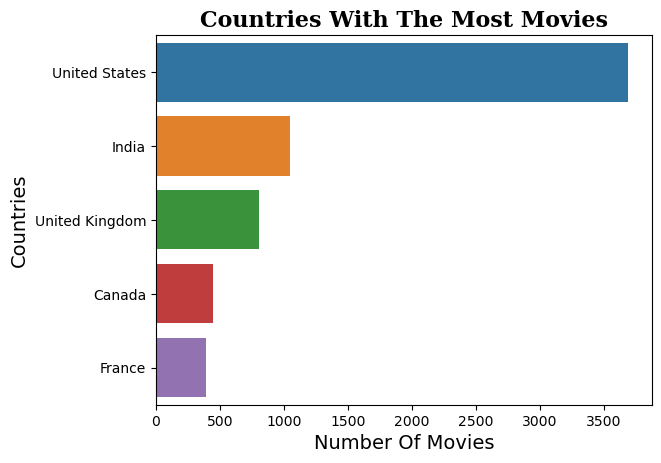

In [264]:
x = country_count['no_of_shows']
y = country_count['country']

sns.barplot(country_count, x=x, y=y)
title_font = {
    'family': 'serif',
    'weight': 'bold',
    'color': 'black',
    'size': 16
}
plt.title('Countries With The Most Movies', fontdict = title_font)
plt.xlabel('Number Of Movies', weight = 'normal', size = 14)
plt.ylabel('Countries',weight = 'normal', size = 14)
plt.show()


### Which genre populate netflix the most?

In [266]:
df['listed_in']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [269]:
#check the listed_in column for duplicates
df['listed_in'].isnull().sum()

0

In [271]:
df['listed_in'] = df['listed_in'].str.split(',')

In [273]:
genre = df.explode('listed_in')

In [275]:
genre.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",[Unknown],2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021.0


In [279]:
genre['listed_in'] = genre['listed_in'].apply(lambda x: x.strip())

In [288]:
genre_count = pd.DataFrame(genre.groupby(['listed_in'])['show_id'].count().sort_values(ascending=False)).reset_index()

In [296]:
genre_count.rename(columns={'listed_in':'Genre', 'show_id':'Number Of Movies'}, inplace = True)

In [308]:
top_5_movies_by_genre = genre_count[0:5]

In [310]:
top_5_movies_by_genre

,Genre,Number Of Movies
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


###### Visualization

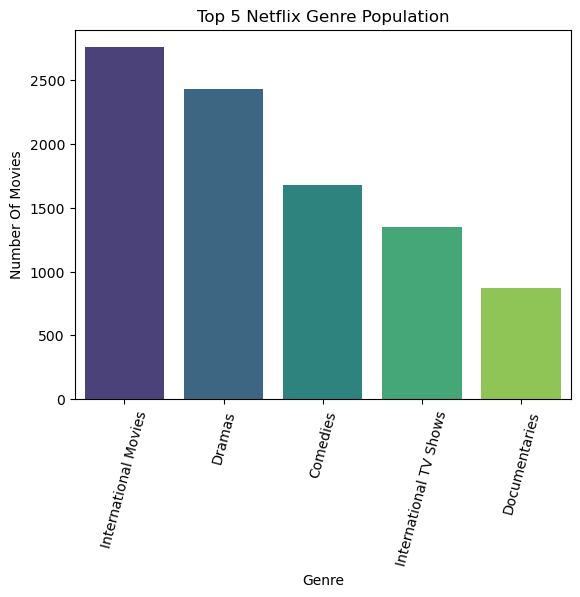

In [315]:
x = top_5_movies_by_genre['Genre']
y = top_5_movies_by_genre['Number Of Movies']

sns.barplot(top_5_movies_by_genre, x=x, y=y, palette= 'viridis')
plt.xticks(rotation = 75)
plt.title('Top 5 Netflix Genre Population')
plt.show()


In [321]:
df.drop('year_added', axis = 1, inplace= True)

In [323]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",[Unknown],2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,[Unknown],2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


In [324]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

   ## Insights
  * It is shown in the barplot and the table above that Netflix has focused more on Movies than series in recent years
  * 2019 had the highest addition of movies and series to netflix
  * USA has the highest percentage contribution of movies on Netflix of 41.9% and a movie count of 3690
  * The genre population is largely made up of International Movies and Dramas
  